In [2]:
import pandas as pd
from PIL import Image
import numpy as np
import os
import regex as re

In [3]:
image_data = []
counter = 0

# set the path to the folder containing the images
# path = "images/"

# loop over all the files in the folder
for filename in os.listdir("UTKFace"):    
    # open the image file and convert it to a NumPy array
    if (filename == ".DS_Store"):
        continue
    with Image.open(os.path.join("UTKFace", filename)) as img:
    # img_array = np.asarray(img)
        
        parts = filename.split("_") 
        age = int(parts[0])
        gender = int(parts[1])
        ethnicity = int(parts[2])

        image_data.append([filename, img, age, gender, ethnicity])
        counter += 1
        if counter % 5000 == 0:
            print(counter)

# create a DataFrame from the image data
image_df = pd.DataFrame(image_data, columns=["filename", "image", "age", "gender", "ethnicity"])
image_df

5000
10000
15000
20000


,filename,image,age,gender,ethnicity
0,9_1_2_20161219204347420.jpg.chip.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,9,1,2
1,36_0_1_20170117163203851.jpg.chip.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,36,0,1
2,86_1_0_20170120225751953.jpg.chip.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,86,1,0
3,26_1_0_20170116171048641.jpg.chip.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,26,1,0
4,1_1_2_20161219154612988.jpg.chip.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1,2
...,...,...,...,...,...
23703,35_0_0_20170117155112202.jpg.chip.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,35,0,0
23704,52_0_3_20170119200211340.jpg.chip.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,52,0,3
23705,26_0_1_20170116010114628.jpg.chip.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,26,0,1
23706,28_0_1_20170117015458481.jpg.chip.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,28,0,1


In [25]:
np.sum(image_df['age'] >= 81)

540

In [ ]:
image_df = pd.concat([image_df, image_df2])

In [3]:
image_df.to_csv("utkfaceIMG.csv")

In [8]:
data = pd.read_csv("utkface.csv", index_col = 0)
data

,filename,image,age,gender,ethnicity
0,9_1_2_20161219204347420.jpg.chip.jpg,[[[ 93 107 74]\n [ 90 104 71]\n [ 87 101 ...,9,1,2
1,36_0_1_20170117163203851.jpg.chip.jpg,[[[242 228 43]\n [241 227 42]\n [240 226 ...,36,0,1
2,86_1_0_20170120225751953.jpg.chip.jpg,[[[225 230 210]\n [223 228 208]\n [221 226 2...,86,1,0
3,26_1_0_20170116171048641.jpg.chip.jpg,[[[239 238 252]\n [239 238 252]\n [239 238 2...,26,1,0
4,1_1_2_20161219154612988.jpg.chip.jpg,[[[ 97 63 53]\n [ 95 61 49]\n [ 91 57 ...,1,1,2
...,...,...,...,...,...
23703,35_0_0_20170117155112202.jpg.chip.jpg,[[[164 145 115]\n [163 146 116]\n [166 149 1...,35,0,0
23704,52_0_3_20170119200211340.jpg.chip.jpg,[[[17 59 84]\n [15 57 82]\n [14 54 79]\n .....,52,0,3
23705,26_0_1_20170116010114628.jpg.chip.jpg,[[[186 189 198]\n [143 146 155]\n [ 95 95 1...,26,0,1
23706,28_0_1_20170117015458481.jpg.chip.jpg,[[[188 5 0]\n [188 5 0]\n [193 6 ...,28,0,1


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import DatasetFolder
from sklearn.model_selection import train_test_split
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

In [5]:
path = "/"

# load the DataFrame with the image data
# df = pd.read_csv("utkface.csv", index_col = 0)

# define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

counter = 0

# define a function to extract the class label from the image filename
# def get_label(filename):
#     if counter % 100:
#         print(counter)
#     counter += 1
#     return df.loc[df['filename'] == filename]['gender'].item()

# # # apply the image transformations to the dataset
# dataset = DatasetFolder(root=path, loader=torchvision.datasets.folder.default_loader, extensions=('jpg',), transform=transform, target_transform=get_label)

In [8]:
transform(image_df.loc[0]["image"])

tensor([[[-0.0287,  0.0227,  0.1083,  ...,  1.8550,  2.0605,  2.2318],
         [-0.0116,  0.0398,  0.1083,  ...,  1.8037,  1.9749,  2.1290],
         [-0.0116,  0.0398,  0.1254,  ...,  1.7180,  1.8379,  1.9920],
         ...,
         [ 0.9817,  0.9988,  1.0159,  ..., -2.1179, -2.1179, -2.1179],
         [ 0.9988,  0.9988,  1.0159,  ..., -2.1179, -2.1179, -2.1008],
         [ 0.9988,  0.9988,  1.0159,  ..., -2.1179, -2.1179, -2.1179]],

        [[-1.2654, -1.2129, -1.1253,  ...,  0.3627,  0.8179,  1.1681],
         [-1.2479, -1.1954, -1.1078,  ...,  0.2752,  0.6954,  1.0280],
         [-1.2304, -1.1779, -1.0903,  ...,  0.1352,  0.5028,  0.8354],
         ...,
         [-1.7556, -1.7381, -1.7031,  ..., -1.9657, -1.9482, -1.9132],
         [-1.7556, -1.7381, -1.7206,  ..., -1.9657, -1.8957, -1.8256],
         [-1.7556, -1.7556, -1.7381,  ..., -1.9832, -1.9832, -1.9832]],

        [[-1.2119, -1.1596, -1.0724,  ...,  0.5311,  0.9319,  1.2805],
         [-1.1944, -1.1421, -1.0550,  ...,  0

In [6]:
from torch.utils.data import Dataset, DataLoader, random_split


class ImageDataFrameDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_path = os.path.join(self.root_dir, row['filename'])
        image = Image.open(image_path)
        
        if self.transform:
            image = self.transform(image)
        
        label = row['gender']
        # print(label)
        
        return image, label

In [7]:
image_dataset = ImageDataFrameDataset(
    dataframe=image_df,
    root_dir='UTKFace/',
    transform=transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
)


In [8]:
data_loader = DataLoader(
    image_dataset, batch_size=32, shuffle=True, num_workers=4
)

In [9]:
train_ratio = 0.8

# Calculate the sizes of the train and test sets based on the split ratio
train_size = int(len(image_dataset) * train_ratio)
test_size = len(image_dataset) - train_size

# Use random_split to split the dataset into train and test sets

train_dataset, test_dataset = random_split(image_dataset, [train_size, test_size])

In [11]:
import time

# Load the ResNet18 model
model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Create data loaders for the train and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Train the model
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

start_time = time.time()

for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

    # Evaluate the model on the test set after each epoch
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"Elapsed time: {time.time() - start_time:.4f} seconds")
    print(f'Epoch {epoch}: Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

/Users/avacrnkovic-rubsamen/opt/anaconda3/envs/cos429/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/Users/avacrnkovic-rubsamen/opt/anaconda3/envs/cos429/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Elapsed time: 9293.0282 seconds
Epoch 0: Test Loss: 0.0125, Accuracy: 82.35%
Elapsed time: 14480.6597 seconds
Epoch 1: Test Loss: 0.0105, Accuracy: 85.07%
Elapsed time: 18247.0097 seconds
Epoch 2: Test Loss: 0.0094, Accuracy: 87.12%
Elapsed time: 21996.7553 seconds
Epoch 3: Test Loss: 0.0089, Accuracy: 87.52%
Elapsed time: 26234.8859 seconds
Epoch 4: Test Loss: 0.0085, Accuracy: 87.98%
Elapsed time: 30256.6963 seconds
Epoch 5: Test Loss: 0.0083, Accuracy: 88.46%
Elapsed time: 33930.2016 seconds
Epoch 6: Test Loss: 0.0081, Accuracy: 88.84%
Elapsed time: 37630.8184 seconds
Epoch 7: Test Loss: 0.0080, Accuracy: 89.14%
Elapsed time: 41675.2077 seconds
Epoch 8: Test Loss: 0.0079, Accuracy: 89.25%
Elapsed time: 45339.1901 seconds
Epoch 9: Test Loss: 0.0083, Accuracy: 89.08%


In [46]:
import matplotlib.pyplot as plt

test_loss = 0
correct = 0
counter = 0

misclassified_images = []
misclassified_labels = []


with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        misclassified = (predicted != labels).nonzero()[:, 0]
        for i in misclassified:
            misclassified_images.append(data[i])
            misclassified_labels.append(predicted[i])
            counter += 1

In [47]:
print(counter)

518


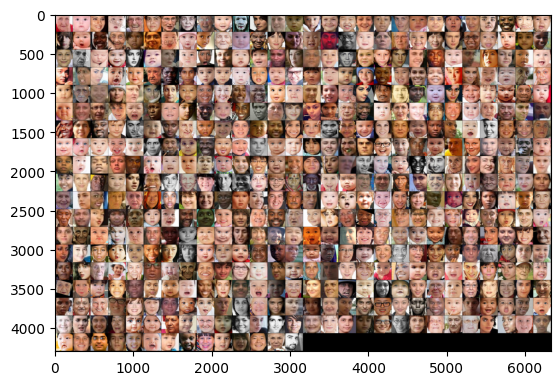

Misclassified labels: [tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0)

In [55]:
# Create a grid of misclassified images and plot it
mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

norm_images = []
for img in misclassified_images:
    norm_images.append(img * std + mean)


grid = torchvision.utils.make_grid(norm_images, nrow=28)
plt.imshow(grid.permute(1, 2, 0))
plt.show()

# Print the labels of the misclassified images
print("Misclassified labels:", misclassified_labels)

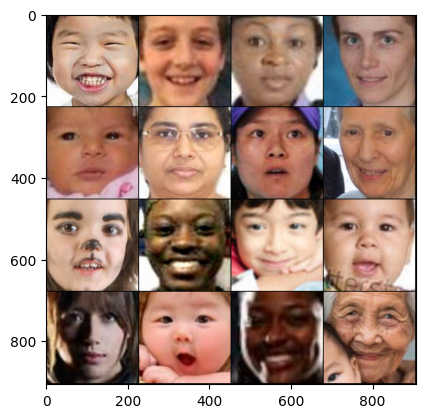

Misclassified labels: [tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1)]


In [41]:
grid = torchvision.utils.make_grid(norm_images[16:32], nrow=4)
plt.imshow(grid.permute(1, 2, 0))
plt.show()

# Print the labels of the misclassified images
print("Misclassified labels:", misclassified_labels[16:32])

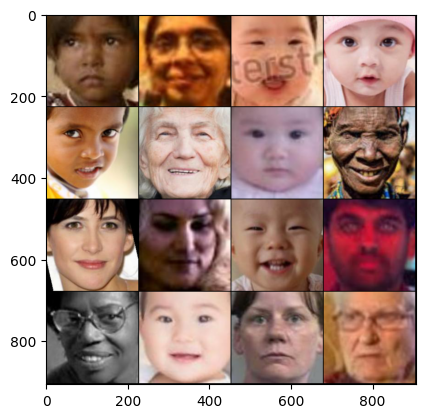

Misclassified labels: [tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0)]


In [44]:
grid = torchvision.utils.make_grid(norm_images[32:48], nrow=4)
plt.imshow(grid.permute(1, 2, 0))
plt.show()

# Print the labels of the misclassified images
print("Misclassified labels:", misclassified_labels[32:48])

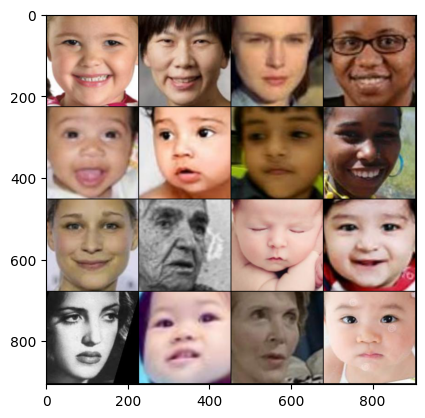

Misclassified labels: [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0)]


In [45]:
grid = torchvision.utils.make_grid(norm_images[48:], nrow=4)
plt.imshow(grid.permute(1, 2, 0))
plt.show()

# Print the labels of the misclassified images
print("Misclassified labels:", misclassified_labels[48:])

In [1]:
torch.save(misclassified_images, 'base_misclassified_images.pt')

NameError: name 'torch' is not defined